# Tips Data

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
sns.set(color_codes=True)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
X = tips.drop(['tip'], axis=1).values
y = tips['tip'].values
(X.shape, y.shape)

((244, 6), (244,))

# Red and White Wine

In [50]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [36]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [37]:
X, y = wines.data, wines.target
print('feature set shape:', X.shape)
print('target shape:', y.shape)

feature set shape: (178, 13)
target shape: (178,)


In [38]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [45]:
df = pd.DataFrame(data=np.column_stack((X, y)),
                  columns=wines.feature_names + ['quality'])
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [49]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [53]:
rfr = RandomForestRegressor(random_state=0,
                            n_estimators=100)
rfr_name = rfr.__class__.__name__
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [56]:
feature_importances = rfr.feature_importances_
importance = sorted(zip(feature_importances, wines.feature_names), reverse=True)
importance

[(0.4003617177435043, 'flavanoids'),
 (0.21349905827712812, 'od280/od315_of_diluted_wines'),
 (0.19909716806800085, 'proline'),
 (0.09509939044824216, 'color_intensity'),
 (0.05327014036539563, 'alcohol'),
 (0.020984139462305405, 'hue'),
 (0.005177915013845026, 'magnesium'),
 (0.004493051198740369, 'alcalinity_of_ash'),
 (0.00242253506833349, 'malic_acid'),
 (0.0018445759047997, 'proanthocyanins'),
 (0.0016584077895620115, 'total_phenols'),
 (0.0013007464583848312, 'ash'),
 (0.0007911542017581422, 'nonflavanoid_phenols')]

# Boston Data

In [58]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [59]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [60]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [61]:
X, y = boston.data, boston.target
print('feature shape:', X.shape)
print('target shape:', y.shape)

feature shape: (506, 13)
target shape: (506,)


In [62]:
rfr = RandomForestRegressor(random_state=0,
                            n_estimators=100)
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [63]:
features = boston.feature_names

In [64]:
feature_importances = rfr.feature_importances_
importance = sorted(zip(feature_importances, features), reverse=True)
importance[:3]

[(0.45730362625767507, 'RM'),
 (0.3500866188568138, 'LSTAT'),
 (0.06518862820215897, 'DIS')]

# Feature Scaling

Feature scaling is standardizing feature set data. It is done by standardizing the variance so that the features has a mean of zero and a standard deviation of 1.

`scikit-learn` applies `StandardScaler`, which standardizes features by removing mean and scaling to unit variance.

In [65]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [66]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [67]:
X, y = digits.data, digits.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
sgd = SGDClassifier(random_state=0, 
                    max_iter=1000,
                    tol=0.001)
sgd.fit(X_train, y_train)
sgd_name = sgd.__class__.__name__

In [70]:
print(f'<< {sgd_name} >>')

<< SGDClassifier >>


In [71]:
y_pred = sgd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('unscaled "test" accuracy:', accuracy)

unscaled "test" accuracy: 0.9466666666666667


In [72]:
scaler = StandardScaler().fit(X_train)
X_train_std, X_test_std = scaler.transform(X_train), scaler.transform(X_test)

In [73]:
sgd = SGDClassifier(random_state=0, 
                    max_iter=1000,
                    tol=0.001)
sgd.fit(X_train_std, y_train)
sgd_name = sgd.__class__.__name__

In [74]:
y_pred = sgd.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print('scaled "test" accuracy:', accuracy)

scaled "test" accuracy: 0.9533333333333334


# Dimensionality Reduction

Dimensionality (or feature) reduction is reducing the number of random variables under consideration of obtaining a set of principal variables (or components). Principal components are a set of values of linearly uncorrelated variables.

Dimensionality reduction can simplify models, reduce training time, reduce overfitting and avoid curse of dimensionality.

Dimensionality reduction is useful for unsupervised learning.

Three common `scikit-learn` dimensionality reduction techniques are:
1. principal component analysis (PCA)
2. linear discriminant analysis (LDA)
3. isomap

In [76]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [78]:
X, y = iris.data, iris.target

In [80]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
components = pca.n_components_
components

2

In [81]:
model = PCA(n_components=components)
model.fit(X)

X_2D = model.transform(X)
iris_df = sns.load_dataset('iris')
iris_df['PCA1'] = X_2D[:, 0]
iris_df['PCA2'] = X_2D[:, 1]
iris_df[['PCA1', 'PCA2']].head(3)

,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949


Text(0.5, 0.98, 'PCA reduction')

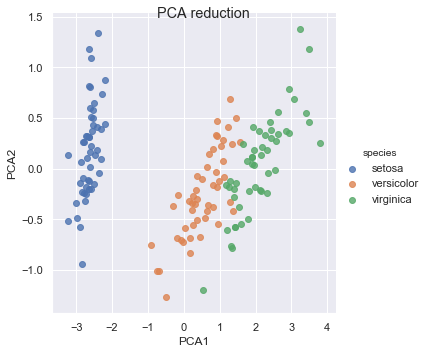

In [83]:
sns.set(color_codes=True)
sns.lmplot('PCA1', 'PCA2', hue='species',
           data=iris_df, fit_reg=False)
plt.suptitle('PCA reduction')

In [84]:
lda = LinearDiscriminantAnalysis(n_components=2)
transform_lda = lda.fit_transform(X, y)
iris_df['LDA1'] = transform_lda[:, 0]
iris_df['LDA2'] = transform_lda[:, 1]

iris_df[['LDA1', 'LDA2']].head(3)

,LDA1,LDA2
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384


Text(0.5, 0.98, 'LDA reduction')

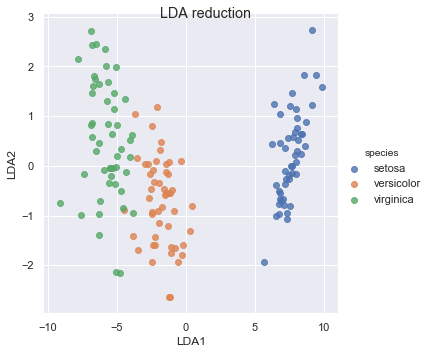

In [85]:
sns.lmplot('LDA1', 'LDA2', hue='species',
           data=iris_df, fit_reg=False)
plt.suptitle('LDA reduction')

In [86]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [87]:
digits = load_digits()
X, y = digits.data, digits.target

In [88]:
print('feature data shape:', X.shape)

feature data shape: (1797, 64)


In [89]:
iso = Isomap(n_components=2)
iso_name = iso.__class__.__name__

In [90]:
iso.fit(digits.data)
data_projected = iso.transform(X)

print('project data to 2D:', data_projected.shape)

/usr/local/lib/python3.7/site-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


project data to 2D: (1797, 2)


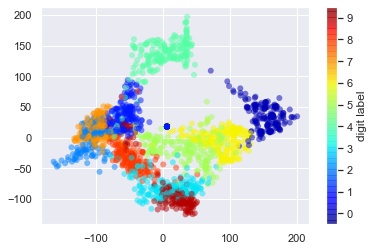

In [91]:
project_1, project_2 = data_projected[:, 0], data_projected[:, 1]
plt.figure(iso_name)
plt.scatter(project_1, project_2, c=y, edgecolor='none',
            alpha=0.5, cmap='jet')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)